# P12_L04 Bivariate Visualizations - Visualizations of two Variables

Lesson Overview

The current lesson focuses on bivariate visualizations, meaning those visualizations involving two variables. 

The variation in one variable will affect the value of the other variable.

By the end of this lesson, you will be able to create and analyze different types of bivariate visualizations for all possible combinations of qualitative and quantitative variables. 

You will learn to code the following types of visualizations:

* heat maps

* scatterplots
* violin plots
* box plots
* clustered bar charts
* faceting
* line plots

At the end of the lesson, we have introduced a few different visualizations, particularly, swarm, rug, strip, and stacked plots.

## Scatterplots for quantitative variable VS. quantitative variable
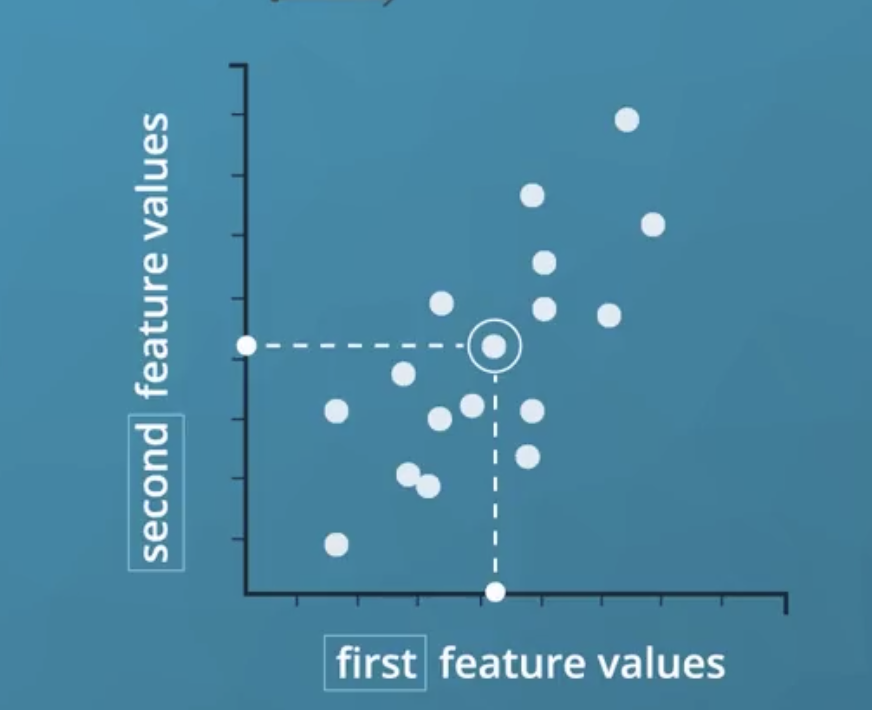

### Person correlation corefficient 

* Statistic quantifying the strength of linear correlation between two numeric variables

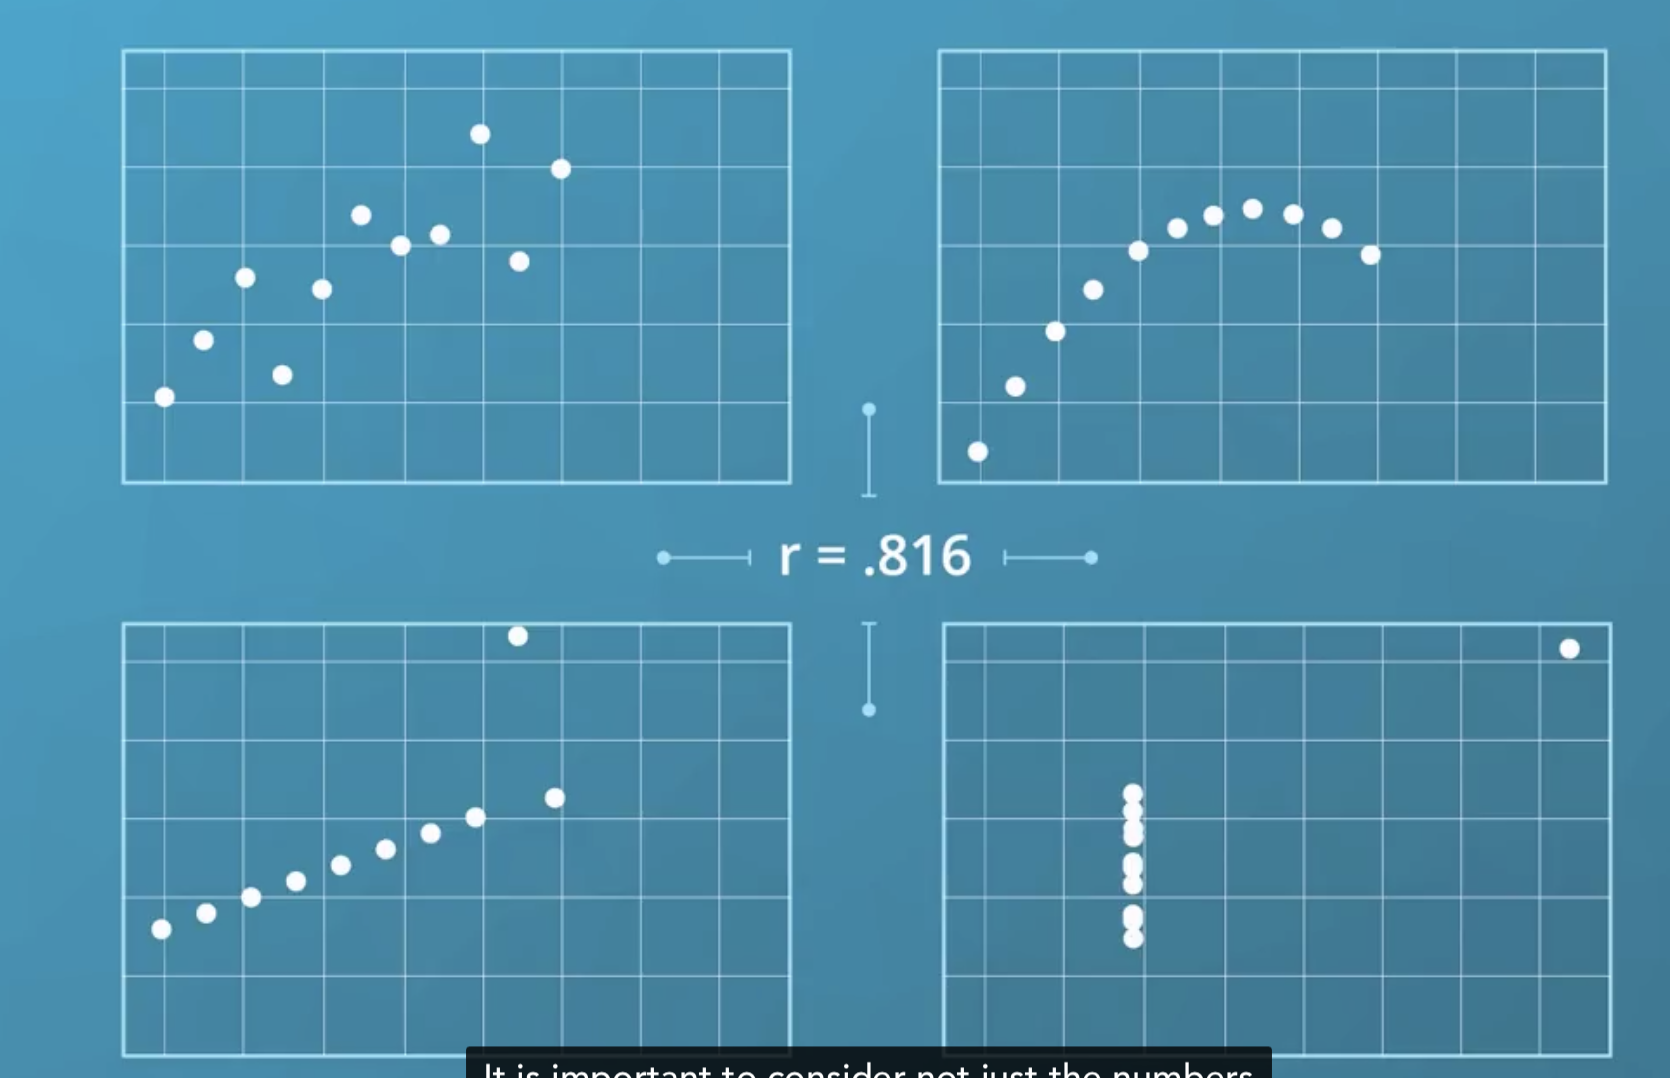

* <font color=red > It is important for not considering the correlation coefficient alone </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = sns.load_dataset('mpg')

In [3]:
import mitosheet
mitosheet.sheet(fuel_econ, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-29efaa00-5894-4a5f-992f-9b13fd7493ff", "code": {"imports…

In [4]:
from mitosheet import *; register_analysis('UUID-27a7987b-869e-4285-aea0-ec1bf82625ef')

# Drop duplicates in fuel_econ
fuel_econ = fuel_econ.drop_duplicates(keep='first')

# Pivoted fuel_econ into df2
fuel_econ_pivot = pd.DataFrame(data={})


## Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

In [5]:
# Import plotly and create a figure
import plotly.graph_objects as go
fig = go.Figure()



# Add the scatter traces to the figure
for column_header in ['displacement']:
    fig.add_trace(go.Scatter(
        x=fuel_econ[column_header],
        y=fuel_econ['mpg'],
        mode='markers',
        name=str(column_header)
    ))

# Update the layout
# See Plotly documentation for cutomizations: https://plotly.com/python/reference/scatter/
fig.update_layout(
    xaxis_title="Displacement (10 ml)",
    yaxis_title="Combined Fuel Eff. (mpg)",
    title="displacement, mpg scatter plot",
)
fig.show(renderer="iframe")

Backing off send_request(...) for 1.0s (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))))


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

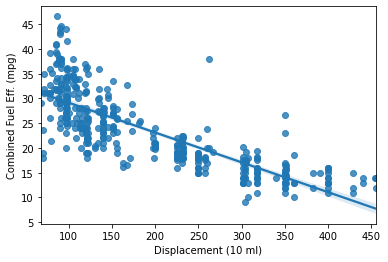

In [6]:
sns.regplot(data=fuel_econ, x='displacement', y='mpg', fit_reg='True')
plt.xlabel("Displacement (10 ml)")
plt.ylabel("Combined Fuel Eff. (mpg)")

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

* Overplotting

Where a plot is created with too many overlapping points

<font color=red> Resolve with: </font>
    Sampling, Transparency, Jitter
    
    

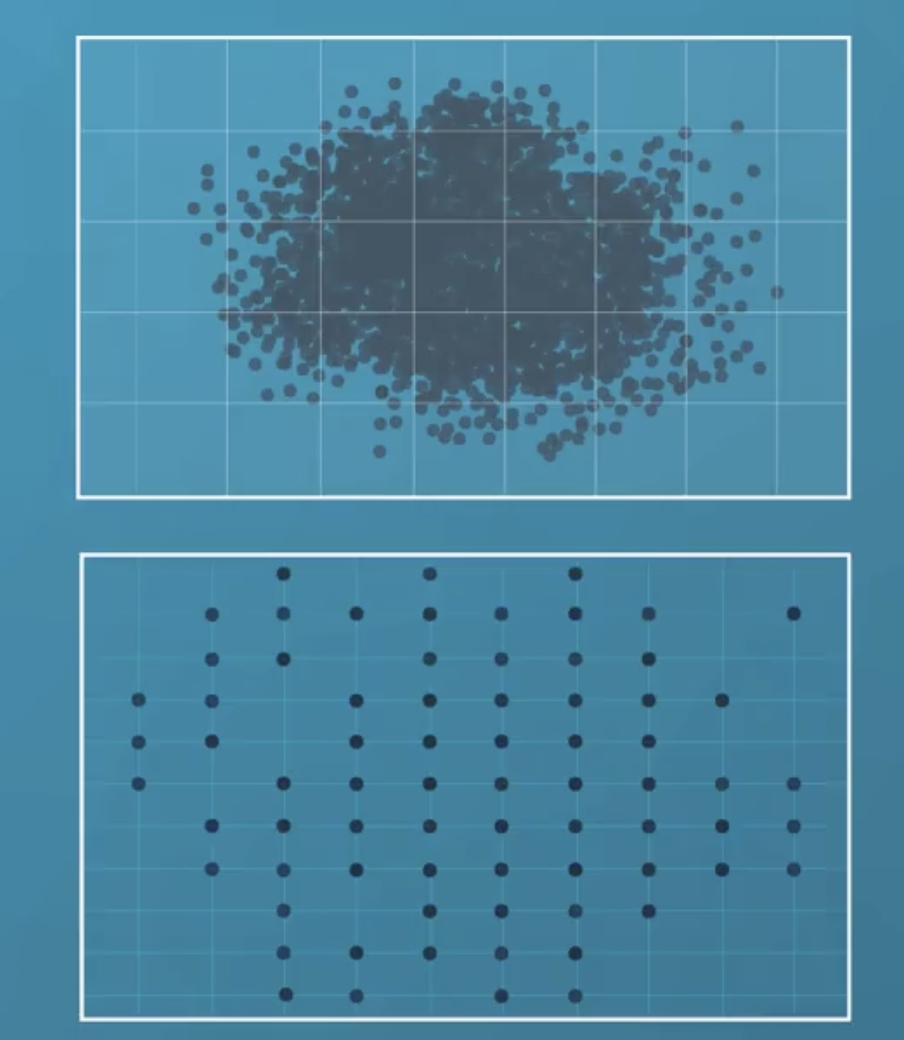

Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

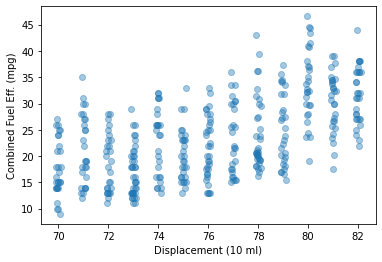

Backing off send_request(...) for 1.1s (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))))


In [7]:
sns.regplot(data=fuel_econ, x='model_year', y='mpg', fit_reg=False, x_jitter=0.1,
            scatter_kws = {'alpha':0.4}) #only works in sns.regplot()
plt.xlabel("Displacement (10 ml)")
plt.ylabel("Combined Fuel Eff. (mpg)")

In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.1 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.

## Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from **overplotting** , where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

# Heat Map

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's *hist2d()* function.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

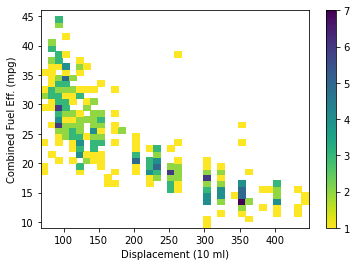

In [8]:
bins_x = np.arange(68, 455, 10)
bins_y = np.arange(9, 47, 1)
plt.hist2d(data=fuel_econ, x='displacement', y='mpg', cmin=0.5,
           cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel("Displacement (10 ml)")
plt.ylabel("Combined Fuel Eff. (mpg)")

In [9]:
fuel_econ[['displacement', 'mpg']].describe()

,displacement,mpg
count,398.000000,398.000000
mean,193.425879,23.514573
std,104.269838,7.815984
min,68.000000,9.000000
25%,104.250000,17.500000
50%,148.500000,23.000000
75%,262.000000,29.000000
max,455.000000,46.600000


## Violin Plots

There are a few ways of plotting the relationship between one **quantitative** and one **qualitative** variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's *violinplot()* function can be used to create violin plots.

In [10]:
country_classes = ['usa', 'europe','japan']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=country_classes)
fuel_econ['origin'] = fuel_econ['origin'].astype(vclasses)

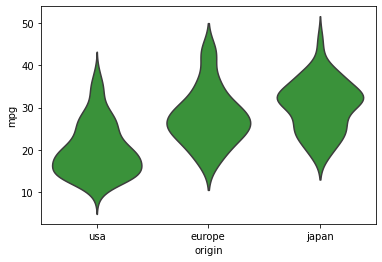

In [11]:
base_color = sns.color_palette()[2]
sns.violinplot(data=fuel_econ, x='origin', y='mpg',
               color=base_color, inner=None);

## Box Plots

A **box plot** is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot() function.

(2.405633925841342, 54.02960485777911)

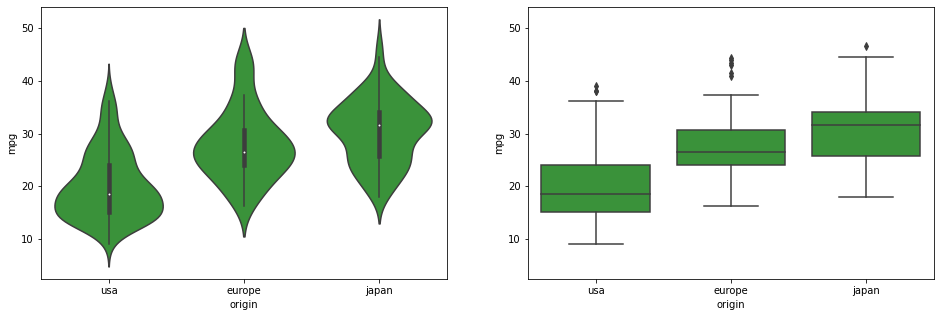

In [15]:
# Step 1. Import packages

# Step 2. Load data

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
#sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
#vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
#fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[2]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=fuel_econ, x='origin', y='mpg',
               color=base_color);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='origin', y='mpg',
               color=base_color);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.


Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

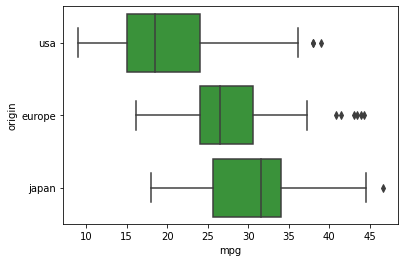

In [16]:
sns.boxplot(data=fuel_econ, y='origin', x='mpg',
               color=base_color);

In **violinplot**, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting <font color=red> **inner='quartile'** </font>, three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

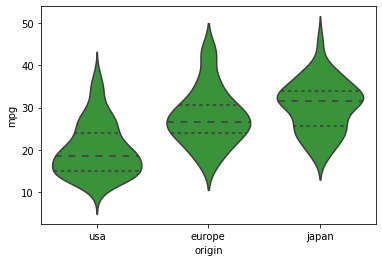

In [18]:
sns.violinplot(data=fuel_econ, x='origin', y='mpg',
               color=base_color, inner='quartile');

## Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

<AxesSubplot:xlabel='cylinders', ylabel='count'>

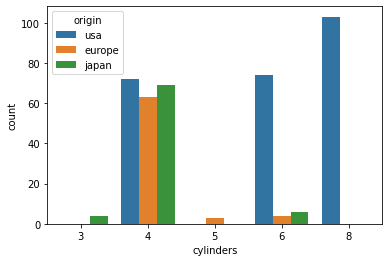

In [24]:
sns.countplot(data=fuel_econ, hue='origin', x='cylinders')

## Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

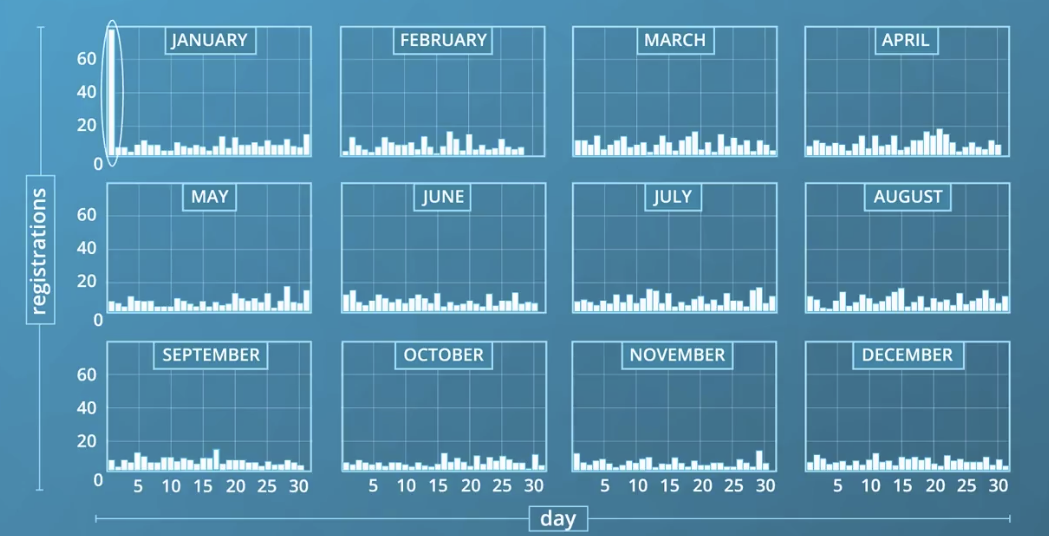

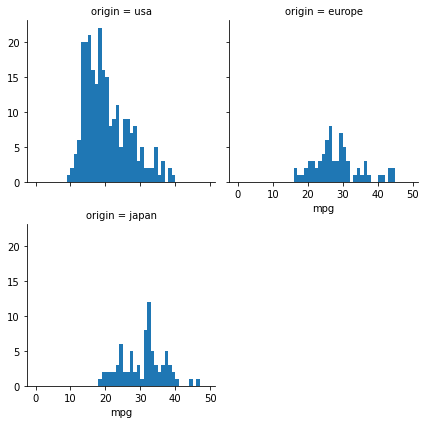

In [27]:
bins = np.arange(0,50,1)
g = sns.FacetGrid(data=fuel_econ, col='origin', col_wrap=2, sharey=True)
g.map(plt.hist, 'mpg', bins=bins);

## Adapted Bar Charts

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

<AxesSubplot:xlabel='origin', ylabel='mpg'>

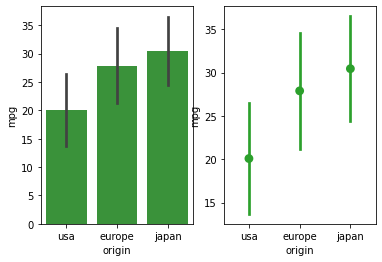

In [31]:
plt.subplot(1,2,1)
sns.barplot(data=fuel_econ, x='origin', y='mpg',
            ci='sd', color=base_color)

plt.subplot(1,2,2)
sns.pointplot(data=fuel_econ, x='origin', y='mpg',
            ci='sd', color=base_color, linestyles='')

## Line Plots
*<font color=red> **Emphasize relative change** </font>

*<font color=red> **Emphasize trends across x-values** </font>


The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

Text(0, 0.5, 'Miles per Gallon')

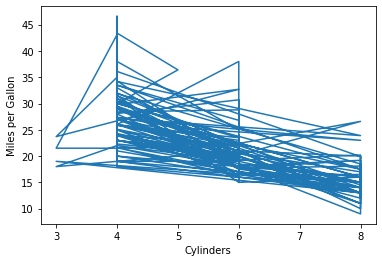

In [34]:
plt.errorbar(data=fuel_econ, x='cylinders', y='mpg')
plt.xlabel('Cylinders')
plt.ylabel('Miles per Gallon')

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [35]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(3, 9, 1)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['cylinders'], bin_edges, include_lowest = True)
displ_binned

0        (7.0, 8.0]
1        (7.0, 8.0]
2        (7.0, 8.0]
3        (7.0, 8.0]
4        (7.0, 8.0]
           ...     
393    (2.999, 4.0]
394    (2.999, 4.0]
395    (2.999, 4.0]
396    (2.999, 4.0]
397    (2.999, 4.0]
Name: cylinders, Length: 398, dtype: category
Categories (5, interval[float64]): [(2.999, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0]]

<ErrorbarContainer object of 3 artists>

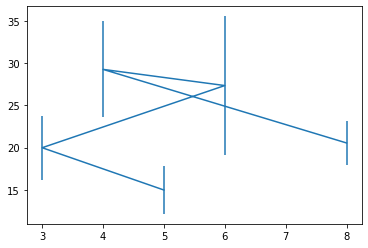

In [43]:
mpg_mean = fuel_econ['mpg'].groupby(fuel_econ['cylinders']).mean()
mpg_std = fuel_econ['mpg'].groupby(fuel_econ['cylinders']).std()

plt.errorbar(x=fuel_econ['cylinders'].unique(), y=mpg_mean, yerr=mpg_std)